In [1]:
import torch 
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# device
# lets import our dataset
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
torch.manual_seed(42)
n_sample = 1000
random_seed = 42
X, y = make_moons(n_samples = n_sample, noise = 0.04, random_state = random_seed)

In [4]:
X.shape,y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [5]:
X[:10], y[:10]

(array([[-0.01535155,  0.39858357],
        [ 0.96563716, -0.46603945],
        [ 0.91129221, -0.400858  ],
        [ 0.39506559, -0.38671088],
        [-0.84362286,  0.52969301],
        [ 0.58442293, -0.33717733],
        [ 0.29368575, -0.20810038],
        [-0.0204332 ,  0.44177939],
        [ 1.62332559, -0.28439799],
        [ 0.6770325 ,  0.79677148]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [6]:
data_df = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"y":y})
data_df.head()

,X0,X1,y
0,-0.015352,0.398584,1
1,0.965637,-0.466039,1
2,0.911292,-0.400858,1
3,0.395066,-0.386711,1
4,-0.843623,0.529693,0


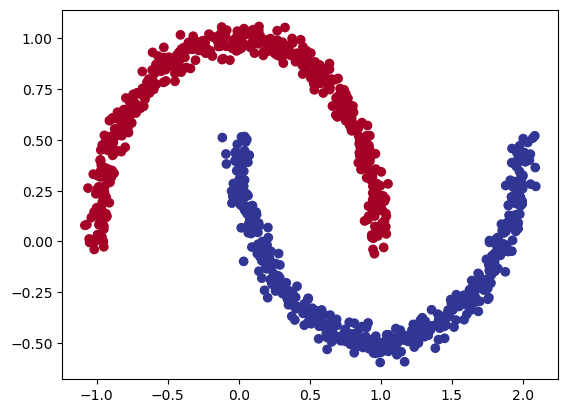

In [7]:
### lets plot and  visualize the data
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

**Seems like two parabola intertwined****

In [8]:
## turning data into tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

## spliting the dataset in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=random_seed)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [9]:
## build the model blueprint
class MoonModel(nn.Module):
    def __init__(self, ins,out,hidden_units):
        super().__init__()
        self.ly1 = nn.Linear(in_features=ins, out_features=hidden_units)
        self.ly2 = nn.Linear(in_features= hidden_units, out_features= hidden_units)
        self.ly3 = nn.Linear(in_features=hidden_units, out_features=out)
        self.relu=nn.ReLU()
    def forward(self,x):
        tmp = self.ly1(x)
        tmp = self.relu(tmp)
        tmp = self.ly2(tmp)
        tmp = self.relu(tmp)
        tmp = self.ly3(tmp)
        return tmp

moonmodel = MoonModel(ins = 2, out = 1 , hidden_units=10).to(device)
    

In [10]:
moonmodel, moonmodel.state_dict()

(MoonModel(
   (ly1): Linear(in_features=2, out_features=10, bias=True)
   (ly2): Linear(in_features=10, out_features=10, bias=True)
   (ly3): Linear(in_features=10, out_features=1, bias=True)
   (relu): ReLU()
 ),
 OrderedDict([('ly1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188],
                       [ 0.6146,  0.1323],
                       [ 0.5224,  0.0958],
                       [ 0.3410, -0.0998],
                       [ 0.5451,  0.1045],
                       [-0.3301,  0.1802]], device='cuda:0')),
              ('ly1.bias',
               tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                        0.0667, -0.6984], device='cuda:0')),
              ('ly2.weight',
               tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555

In [11]:
# moonmodel(X_train[:2])

In [12]:
## setting up the loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = moonmodel.parameters(), lr =0.1)


In [13]:
## lets do a dry run for our moonmodel
print("logits")
print(moonmodel(X_train.to(device)[:2]).squeeze())



logits
tensor([0.0016, 0.0097], device='cuda:0', grad_fn=<SqueezeBackward0>)


In [14]:
## prediction probabilites
print("pred probs:")
print(torch.sigmoid(moonmodel(X_train.to(device))[:2]))

pred probs:
tensor([[0.5004],
        [0.5024]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [15]:
## prediction probabilites
print("pred probabilites")
print(torch.round(torch.sigmoid(moonmodel(X_train.to(device))[:2])))

pred probabilites
tensor([[1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [16]:
## we'll take help from torchmetrics
!pip -q install torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task = "multiclass", num_classes=2).to(device)
acc_fn

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

MulticlassAccuracy()

In [17]:
## lets get started 
torch.manual_seed(42)
epochs = 1000
## loading dataset into GPU
X_train , y_train = X_train.to(device), y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

## loop section
for epoch in range(epochs):
    ## training mode
    moonmodel.train()
    ## forward pass 
    y_logits = moonmodel(X_train).squeeze()
    y_pred_prob = torch.sigmoid(y_logits)
    y_pred = torch.round(y_pred_prob)
    
    ## calc loss
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_pred , y_train.int())
    
    ## zero the grad
    optimizer.zero_grad()
    
    ## backprop
    loss.backward()
    
    ## update the optimizer
    optimizer.step()
    
    ## testing time
    moonmodel.eval()
    with torch.inference_mode():
        ## forward pass
        test_logits = moonmodel(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        ## calc los
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_pred, y_test.int())
    ## printing out the info
    if epoch%100==0:
        print(f"Epoch: {epoch}|| loss_ {loss}|| acc_ {acc} || test_accuracy _{test_acc}")
                           
                               


Epoch: 0|| loss_ 0.6953651309013367|| acc_ 0.375 || test_accuracy _0.4950000047683716
Epoch: 100|| loss_ 0.38672763109207153|| acc_ 0.8174999952316284 || test_accuracy _0.7649999856948853
Epoch: 200|| loss_ 0.237726628780365|| acc_ 0.8849999904632568 || test_accuracy _0.8999999761581421
Epoch: 300|| loss_ 0.1926889717578888|| acc_ 0.9100000262260437 || test_accuracy _0.925000011920929
Epoch: 400|| loss_ 0.15415173768997192|| acc_ 0.9362499713897705 || test_accuracy _0.9350000023841858
Epoch: 500|| loss_ 0.11014652252197266|| acc_ 0.9537500143051147 || test_accuracy _0.9700000286102295
Epoch: 600|| loss_ 0.07200577855110168|| acc_ 0.9825000166893005 || test_accuracy _0.9900000095367432
Epoch: 700|| loss_ 0.046515192836523056|| acc_ 0.9925000071525574 || test_accuracy _0.9950000047683716
Epoch: 800|| loss_ 0.031928353011608124|| acc_ 0.9987499713897705 || test_accuracy _1.0
Epoch: 900|| loss_ 0.02337311953306198|| acc_ 1.0 || test_accuracy _1.0


In [18]:
## Now that the training of the model is done..
## plot the prediction
import numpy as np
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

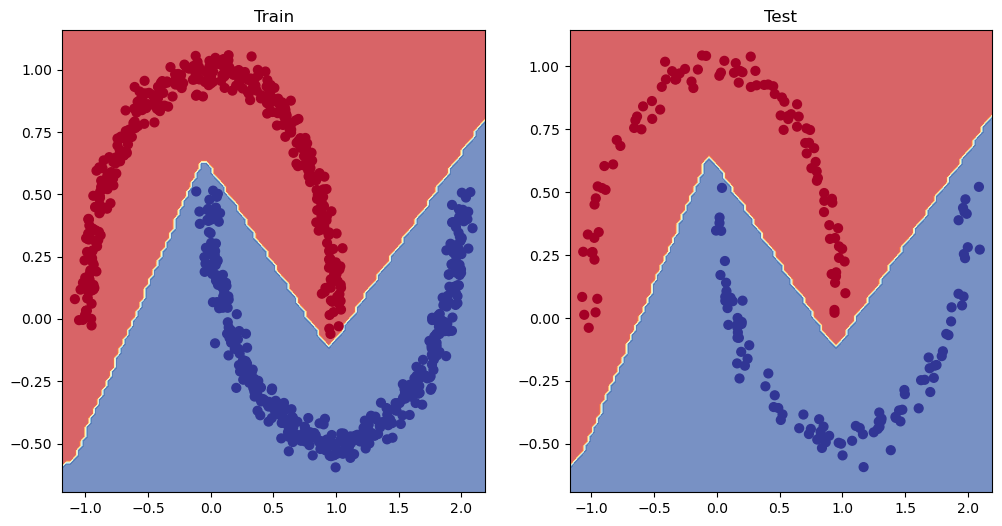

In [19]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moonmodel, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moonmodel, X_test, y_test)

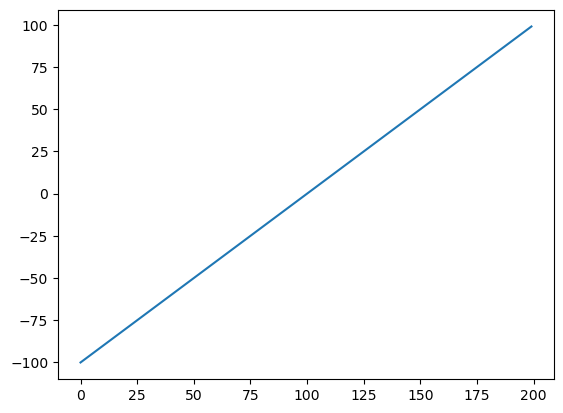

In [20]:
tensor_A = torch.arange(-100,100,1)
plt.plot(tensor_A)

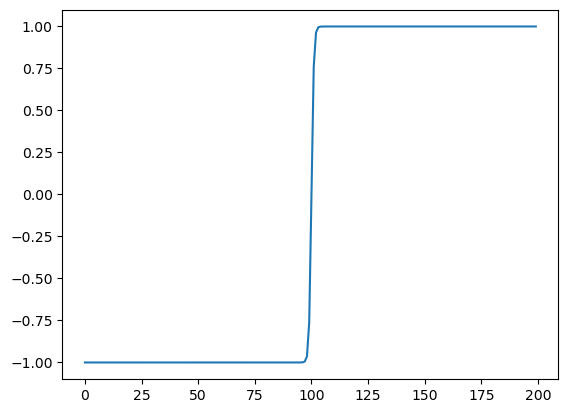

In [21]:
plt.plot(torch.tanh(tensor_A))

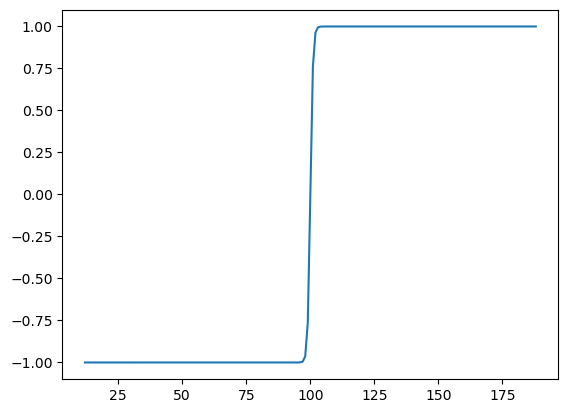

In [22]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x))/(torch.exp(x) + torch.exp(-x))
plt.plot(tanh(tensor_A))

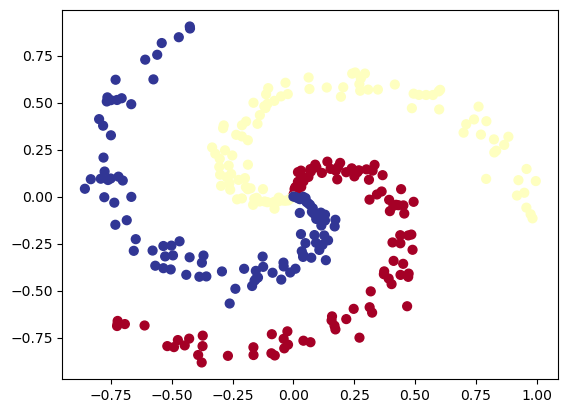

In [23]:
# Code for creating a spiral dataset from CS231n
import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [24]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [25]:
# Let's calculate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [26]:


# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module): 
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_1 = SpiralModel().to(device)
model_1

SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [27]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out untrained model outputs
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.int64 torch.int64
Logits:
tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0530,  0.2257],
        [-0.2223, -0.0604,  0.2384],
        [-0.2174, -0.0555,  0.2826],
        [-0.2201, -0.0502,  0.2792],
        [-0.2195, -0.0565,  0.2457],
        [-0.2212, -0.0581,  0.2440],
        [-0.2251, -0.0631,  0.2354],
        [-0.2116, -0.0548,  0.2336],
        [-0.2170, -0.0552,  0.2842]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2685, 0.3139, 0.4176],
        [0.2707, 0.3142, 0.4151],
        [0.2659, 0.3126, 0.4215],
        [0.2615, 0.3074, 0.4311],
        [0.2609, 0.3092, 0.4299],
        [0.2653, 0.3123, 0.4224],
        [0.2653, 0.3123, 0.4224],
        [0.2659, 0.3127, 0.4214],
        [0.2681, 0.3136, 0.4184],
        [0.2614, 0.3072, 0.4314]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [28]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.02)

In [29]:
# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} ")

Epoch: 0 | Loss: 1.12 Acc: 0.32 
Epoch: 100 | Loss: 0.45 Acc: 0.78 
Epoch: 200 | Loss: 0.12 Acc: 0.96 
Epoch: 300 | Loss: 0.07 Acc: 0.98 
Epoch: 400 | Loss: 0.05 Acc: 0.98 
Epoch: 500 | Loss: 0.04 Acc: 0.99 
Epoch: 600 | Loss: 0.03 Acc: 0.99 
Epoch: 700 | Loss: 0.03 Acc: 0.99 
Epoch: 800 | Loss: 0.02 Acc: 0.99 
Epoch: 900 | Loss: 0.02 Acc: 0.99 


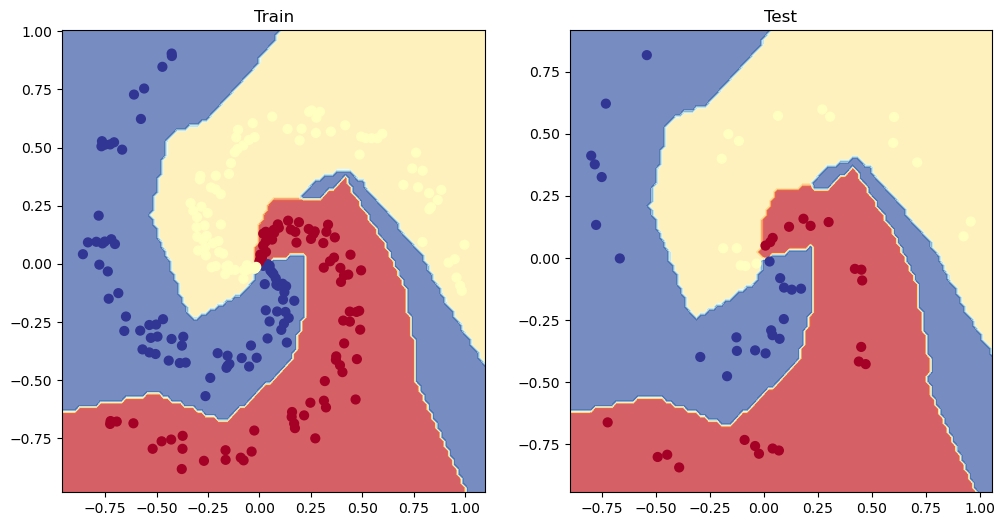

In [30]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)